In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.animation import FuncAnimation
import os

from params import *

tVAT = 0.1 / 4

In [3]:
def init():
    H = np.zeros(totalStep)
    M = np.zeros(totalStep)
    Gex = np.zeros(totalStep)
    T = np.zeros(totalStep)
    H[0] = H0
    M[0] = M0
    Gex[0] = G0
    
    return H, M, Gex, T

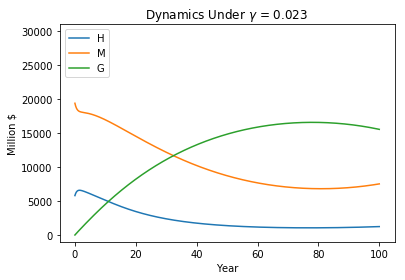

In [16]:
fig, ax = plt.subplots()

def plotGamma(gamma):
    H, M, Gex, T = init()
    t = 0

    for i in range(1, totalStep):
        H[i] = H[i-1] + timeStep * (- c * H[i-1] - logistic(H[i-1]) + (1 - tI) * wageDecay(t, w) * M[i-1])
        M[i] = M[i-1] + timeStep * ((1 - tC) * c * H[i-1] + fMultiplier * logistic(H[i-1]) - wageDecay(t, w) * M[i-1] + econGrowth * M[i-1])
        Gex[i] = Gex[i-1] + timeStep * (tI * wageDecay(t, w) * M[i-1] + tC * c * H[i-1])

        t += timeStep
        T[i] = t

    H, M, G, T = init()
    t = 0

    for i in range(1, totalStep):
        # addition: t_VAT, UBI, S
        H[i] = H[i-1] + timeStep * (UBI * np.exp(gamma * t) - c * H[i-1] - logistic(H[i-1]) + (1 - tI) * wageDecay(t, w) * M[i-1])
        M[i] = M[i-1] + timeStep * ((1 - tC) * c * H[i-1] + fMultiplier * logistic(H[i-1]) - wageDecay(t, w) * M[i-1] - tVAT * M[i-1] + econGrowth * M[i-1])
        G[i] = G[i-1] + timeStep * (S - UBI * np.exp(gamma * t) + tVAT * M[i-1] + tI * wageDecay(t, w) * M[i-1] + tC * c * H[i-1])
        t += timeStep
        T[i] = t
    
    ax.cla()
    ax.plot(T, H, label = 'H')
    ax.plot(T, M, label = 'M')
    ax.plot(T, G - Gex, label = 'G')
#     ax.plot(T, H + M + G - Gex, label = 'Sum')
    ax.legend(loc="upper left", frameon=True)
    
    ax.set_title(r"Dynamics Under $\gamma$ = %.3f"%gamma)
    ax.set_xlabel("Year")
    ax.set_ylabel("Million $")
    
    ax.set_ylim(-1000, 31000)
    ax.set_xlim(-5, 105)
    plt.savefig("outputs/gamma%.3f.png"%gamma)

plotGamma(np.log(100) / 200)

In [5]:
# duration in seconds
duration = 4

# frames per seconds
fps = 25

# total steps
end = 200

# step per frame
spf = int(end / (duration * fps))
print("%i steps per frame"%spf)

# lower: np.log(100) / 200
# upper: np.log(100) / 100
frames = [np.log(100) / (100 + i) for i in range(101)]
    
fname = 'outputs/animated_gamma_%is_%ifps.gif'%(duration, fps)
print(fname)

2 steps per frame
outputs/animated_gamma_4s_25fps.gif


In [5]:
def update(t):
    print('gamma %f'%t, end="\r")
    return plotGamma(t)

# if not os.path.isfile(fname):
anim = FuncAnimation(fig, update, frames=frames, interval=1000 / fps)
anim.save(fname, dpi=80, writer='imagemagick')
plt.close()    